# 케라스 창시자에게 배우는 딥러닝 - 로이터 데이터셋 추가 실험
이 커널은 다음과 같은 형태로 진행 됩니다.  
1. 로이터 데이터셋 예제
2. 층의 은닉 유닛 32개 또는 128개
3. 1개 또는 3개의 은닉층 사용



 

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2113536/2110848 [==============================] - 0s 0us/step


In [2]:
from keras import models
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [4]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [9]:
def model_val(hidden_unit, epochs, layer, activation = 'relu', loss = 'categorical_crossentropy', metrics = ['acc']):
    model = models.Sequential()
    model.add(Dense(hidden_unit, activation = activation, input_shape = (10000,)))
    for i in range(1, layer):
        model.add(Dense(hidden_unit, activation = activation))
    model.add(Dense(46, activation = 'softmax'))

    model.compile(optimizer = 'rmsprop',
                  loss = loss,
                  metrics = metrics)
    
    history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = epochs,
                    batch_size = 512,
                    validation_data = (x_val, y_val))
    history_dict = history.history
    return history_dict
    

In [16]:
def model_test(hidden_unit, epochs, layer, activation = 'relu', loss = 'categorical_crossentropy', metrics = ['acc']):
    model = models.Sequential()
    model.add(Dense(hidden_unit, activation = activation, input_shape = (10000,)))
    for i in range(1, layer):
        model.add(Dense(hidden_unit, activation = activation))
    model.add(Dense(46, activation = 'softmax'))

    model.compile(optimizer = 'rmsprop',
                  loss = loss,
                  metrics = metrics)
    
    model.fit(x_train,
              one_hot_train_labels,
              epochs = epochs,
              batch_size = 512)
    
    results = model.evaluate(x_test, one_hot_test_labels)

    return results

In [11]:
def loss_plot(history_dict):
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label = 'Training loss')
    plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.show()

def acc_plot(history_dict):
    plt.clf()
    acc = history_dict['acc']
    val_acc = history_dict['val_acc']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training acc')
    plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.show()

## 로이터 데이터셋 예제

In [12]:
history_dict = model_val(64, 20, 2, activation = 'relu', loss = 'categorical_crossentropy', metrics = ['acc'])

Epoch 1/20
16/16 [==============================] - 1s 57ms/step - loss: 2.9641 - acc: 0.4835 - val_loss: 1.9347 - val_acc: 0.6480
Epoch 2/20
16/16 [==============================] - 1s 44ms/step - loss: 1.5188 - acc: 0.7120 - val_loss: 1.3310 - val_acc: 0.7200
Epoch 3/20
16/16 [==============================] - 1s 45ms/step - loss: 1.0719 - acc: 0.7781 - val_loss: 1.1355 - val_acc: 0.7510
Epoch 4/20
16/16 [==============================] - 1s 43ms/step - loss: 0.8451 - acc: 0.8250 - val_loss: 1.0398 - val_acc: 0.7840
Epoch 5/20
16/16 [==============================] - 1s 45ms/step - loss: 0.6779 - acc: 0.8578 - val_loss: 0.9736 - val_acc: 0.8010
Epoch 6/20
16/16 [==============================] - 1s 43ms/step - loss: 0.5477 - acc: 0.8887 - val_loss: 0.9211 - val_acc: 0.8160
Epoch 7/20
16/16 [==============================] - 1s 44ms/step - loss: 0.4438 - acc: 0.9093 - val_loss: 0.9068 - val_acc: 0.8110
Epoch 8/20
16/16 [==============================] - 1s 45ms/step - loss: 0.3648 - a

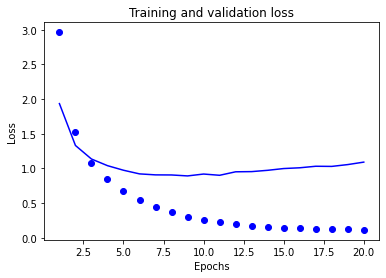

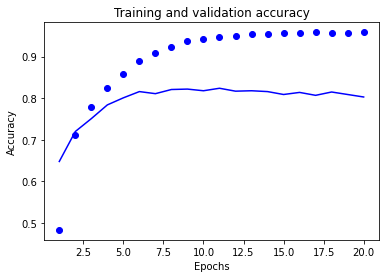

In [13]:
loss_plot(history_dict)
acc_plot(history_dict)

In [17]:
model_test(64, 9, 2, activation = 'relu', loss = 'categorical_crossentropy', metrics = ['acc'])

Epoch 1/9
18/18 [==============================] - 1s 41ms/step - loss: 2.6922 - acc: 0.5550
Epoch 2/9
18/18 [==============================] - 1s 40ms/step - loss: 1.4099 - acc: 0.7112
Epoch 3/9
18/18 [==============================] - 1s 41ms/step - loss: 1.0395 - acc: 0.7749
Epoch 4/9
18/18 [==============================] - 1s 40ms/step - loss: 0.8130 - acc: 0.8245
Epoch 5/9
18/18 [==============================] - 1s 41ms/step - loss: 0.6474 - acc: 0.8622
Epoch 6/9
18/18 [==============================] - 1s 41ms/step - loss: 0.5130 - acc: 0.8957
Epoch 7/9
18/18 [==============================] - 1s 40ms/step - loss: 0.4150 - acc: 0.9159
Epoch 8/9
18/18 [==============================] - 1s 40ms/step - loss: 0.3358 - acc: 0.9286
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9547 - acc: 0.7979


[0.9547308087348938, 0.7978628873825073]

정확도 약 79.8%

## 층의 은닉 유닛 32개 또는 128개
### 층의 은닉 유닛 32

In [18]:
history_dict = model_val(32, 20, 2, activation = 'relu', loss = 'categorical_crossentropy', metrics = ['acc'])

Epoch 1/20
16/16 [==============================] - 1s 40ms/step - loss: 3.1751 - acc: 0.3593 - val_loss: 2.5254 - val_acc: 0.5810
Epoch 2/20
16/16 [==============================] - 1s 33ms/step - loss: 2.0697 - acc: 0.6443 - val_loss: 1.8070 - val_acc: 0.6500
Epoch 3/20
16/16 [==============================] - 1s 34ms/step - loss: 1.5207 - acc: 0.6988 - val_loss: 1.4796 - val_acc: 0.6870
Epoch 4/20
16/16 [==============================] - 1s 33ms/step - loss: 1.2313 - acc: 0.7343 - val_loss: 1.3060 - val_acc: 0.7170
Epoch 5/20
16/16 [==============================] - 1s 32ms/step - loss: 1.0472 - acc: 0.7706 - val_loss: 1.2054 - val_acc: 0.7420
Epoch 6/20
16/16 [==============================] - 1s 32ms/step - loss: 0.9080 - acc: 0.8056 - val_loss: 1.1305 - val_acc: 0.7720
Epoch 7/20
16/16 [==============================] - 1s 33ms/step - loss: 0.7892 - acc: 0.8309 - val_loss: 1.0704 - val_acc: 0.7820
Epoch 8/20
16/16 [==============================] - 1s 32ms/step - loss: 0.6864 - a

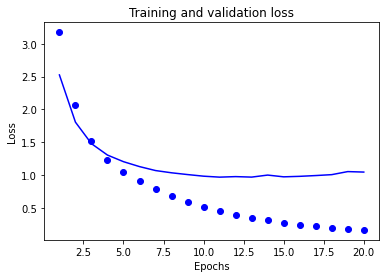

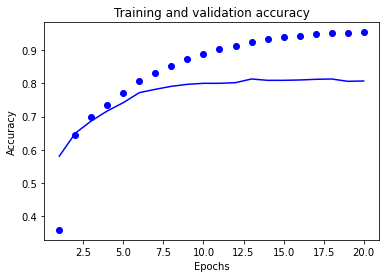

In [19]:
loss_plot(history_dict)
acc_plot(history_dict)

In [20]:
model_test(32, 13, 2, activation = 'relu', loss = 'categorical_crossentropy', metrics = ['acc'])

Epoch 1/13
18/18 [==============================] - 1s 31ms/step - loss: 3.0307 - acc: 0.5340
Epoch 2/13
18/18 [==============================] - 1s 31ms/step - loss: 1.8430 - acc: 0.6445
Epoch 3/13
18/18 [==============================] - 1s 31ms/step - loss: 1.3573 - acc: 0.7222
Epoch 4/13
18/18 [==============================] - 1s 30ms/step - loss: 1.1043 - acc: 0.7679
Epoch 5/13
18/18 [==============================] - 1s 31ms/step - loss: 0.9312 - acc: 0.8009
Epoch 6/13
18/18 [==============================] - 1s 31ms/step - loss: 0.7959 - acc: 0.8331
Epoch 7/13
18/18 [==============================] - 1s 32ms/step - loss: 0.6852 - acc: 0.8557
Epoch 8/13
18/18 [==============================] - 1s 31ms/step - loss: 0.5913 - acc: 0.8781
Epoch 9/13
18/18 [==============================] - 1s 31ms/step - loss: 0.5111 - acc: 0.8919
Epoch 10/13
18/18 [==============================] - 1s 31ms/step - loss: 0.4440 - acc: 0.9048
Epoch 11/13
18/18 [==============================] - 1s 31m

[0.996997058391571, 0.7943009734153748]

정확도 약 79.4%

### 층의 은닉 유닛 128

In [21]:
history_dict = model_val(128, 20, 2, activation = 'relu', loss = 'categorical_crossentropy', metrics = ['acc'])

Epoch 1/20
16/16 [==============================] - 1s 80ms/step - loss: 2.2337 - acc: 0.5589 - val_loss: 1.3816 - val_acc: 0.6980
Epoch 2/20
16/16 [==============================] - 1s 71ms/step - loss: 1.1087 - acc: 0.7603 - val_loss: 1.1010 - val_acc: 0.7630
Epoch 3/20
16/16 [==============================] - 1s 72ms/step - loss: 0.7745 - acc: 0.8366 - val_loss: 0.9959 - val_acc: 0.7810
Epoch 4/20
16/16 [==============================] - 1s 72ms/step - loss: 0.5647 - acc: 0.8784 - val_loss: 0.8832 - val_acc: 0.8120
Epoch 5/20
16/16 [==============================] - 1s 71ms/step - loss: 0.4133 - acc: 0.9132 - val_loss: 0.8743 - val_acc: 0.8160
Epoch 6/20
16/16 [==============================] - 1s 70ms/step - loss: 0.3142 - acc: 0.9334 - val_loss: 0.8786 - val_acc: 0.8060
Epoch 7/20
16/16 [==============================] - 1s 69ms/step - loss: 0.2523 - acc: 0.9444 - val_loss: 0.8675 - val_acc: 0.8200
Epoch 8/20
16/16 [==============================] - 1s 70ms/step - loss: 0.2043 - a

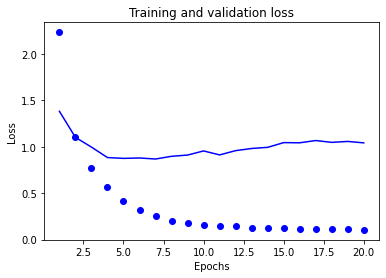

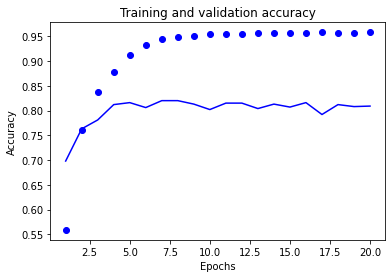

In [22]:
loss_plot(history_dict)
acc_plot(history_dict)

In [23]:
model_test(128, 10, 2, activation = 'relu', loss = 'categorical_crossentropy', metrics = ['acc'])

Epoch 1/10
18/18 [==============================] - 1s 66ms/step - loss: 2.0842 - acc: 0.5591
Epoch 2/10
18/18 [==============================] - 1s 65ms/step - loss: 1.0789 - acc: 0.7689
Epoch 3/10
18/18 [==============================] - 1s 66ms/step - loss: 0.7501 - acc: 0.8427
Epoch 4/10
18/18 [==============================] - 1s 66ms/step - loss: 0.5354 - acc: 0.8850
Epoch 5/10
18/18 [==============================] - 1s 66ms/step - loss: 0.3962 - acc: 0.9142
Epoch 6/10
18/18 [==============================] - 1s 66ms/step - loss: 0.3001 - acc: 0.9330
Epoch 7/10
18/18 [==============================] - 1s 65ms/step - loss: 0.2374 - acc: 0.9453
Epoch 8/10
18/18 [==============================] - 1s 65ms/step - loss: 0.2044 - acc: 0.9477
Epoch 9/10
18/18 [==============================] - 1s 65ms/step - loss: 0.1805 - acc: 0.9501
Epoch 10/10
71/71 [==============================] - 0s 3ms/step - loss: 1.0220 - acc: 0.7970


[1.0220177173614502, 0.796972393989563]

정확도 약 79.7%

## 1개 또는 3개의 은닉층 사용
### 1개의 은닉층 사용

In [24]:
history_dict = model_val(64, 20, 1, activation = 'relu', loss = 'categorical_crossentropy', metrics = ['acc'])

Epoch 1/20
16/16 [==============================] - 1s 49ms/step - loss: 2.6683 - acc: 0.5517 - val_loss: 1.8900 - val_acc: 0.6590
Epoch 2/20
16/16 [==============================] - 1s 45ms/step - loss: 1.5316 - acc: 0.7197 - val_loss: 1.3688 - val_acc: 0.7220
Epoch 3/20
16/16 [==============================] - 1s 44ms/step - loss: 1.0934 - acc: 0.7851 - val_loss: 1.1359 - val_acc: 0.7590
Epoch 4/20
16/16 [==============================] - 1s 42ms/step - loss: 0.8416 - acc: 0.8336 - val_loss: 1.0212 - val_acc: 0.7920
Epoch 5/20
16/16 [==============================] - 1s 42ms/step - loss: 0.6710 - acc: 0.8700 - val_loss: 0.9303 - val_acc: 0.8040
Epoch 6/20
16/16 [==============================] - 1s 44ms/step - loss: 0.5471 - acc: 0.8929 - val_loss: 0.8778 - val_acc: 0.8260
Epoch 7/20
16/16 [==============================] - 1s 42ms/step - loss: 0.4520 - acc: 0.9100 - val_loss: 0.8476 - val_acc: 0.8240
Epoch 8/20
16/16 [==============================] - 1s 42ms/step - loss: 0.3774 - a

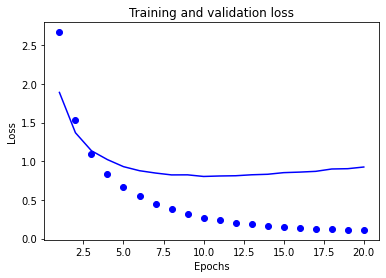

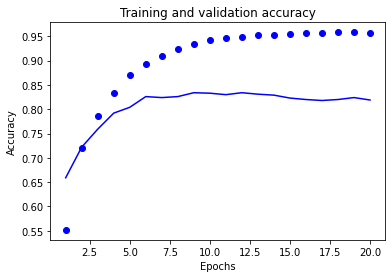

In [25]:
loss_plot(history_dict)
acc_plot(history_dict)

In [27]:
model_test(64, 12, 1, activation = 'relu', loss = 'categorical_crossentropy', metrics = ['acc'])

Epoch 1/12
18/18 [==============================] - 1s 42ms/step - loss: 2.5917 - acc: 0.5880
Epoch 2/12
18/18 [==============================] - 1s 41ms/step - loss: 1.4443 - acc: 0.7354
Epoch 3/12
18/18 [==============================] - 1s 41ms/step - loss: 1.0210 - acc: 0.8007
Epoch 4/12
18/18 [==============================] - 1s 41ms/step - loss: 0.7846 - acc: 0.8438
Epoch 5/12
18/18 [==============================] - 1s 40ms/step - loss: 0.6246 - acc: 0.8760
Epoch 6/12
18/18 [==============================] - 1s 41ms/step - loss: 0.5097 - acc: 0.8989
Epoch 7/12
18/18 [==============================] - 1s 41ms/step - loss: 0.4190 - acc: 0.9158
Epoch 8/12
18/18 [==============================] - 1s 41ms/step - loss: 0.3503 - acc: 0.9277
Epoch 9/12
18/18 [==============================] - 1s 40ms/step - loss: 0.2952 - acc: 0.9358
Epoch 10/12
18/18 [==============================] - 1s 42ms/step - loss: 0.2547 - acc: 0.9419
Epoch 11/12
18/18 [==============================] - 1s 42m

[0.896285891532898, 0.8076580762863159]

정확도 약 80.8%

### 3개의 은닉층 사용

In [28]:
history_dict = model_val(64, 20, 3, activation = 'relu', loss = 'categorical_crossentropy', metrics = ['acc'])

Epoch 1/20
16/16 [==============================] - 1s 53ms/step - loss: 2.5939 - acc: 0.5168 - val_loss: 1.6440 - val_acc: 0.6480
Epoch 2/20
16/16 [==============================] - 1s 42ms/step - loss: 1.3800 - acc: 0.7058 - val_loss: 1.2930 - val_acc: 0.7130
Epoch 3/20
16/16 [==============================] - 1s 43ms/step - loss: 1.0489 - acc: 0.7666 - val_loss: 1.1719 - val_acc: 0.7400
Epoch 4/20
16/16 [==============================] - 1s 43ms/step - loss: 0.8381 - acc: 0.8145 - val_loss: 1.0865 - val_acc: 0.7560
Epoch 5/20
16/16 [==============================] - 1s 44ms/step - loss: 0.6633 - acc: 0.8561 - val_loss: 1.0214 - val_acc: 0.7940
Epoch 6/20
16/16 [==============================] - 1s 43ms/step - loss: 0.5359 - acc: 0.8815 - val_loss: 1.0105 - val_acc: 0.7940
Epoch 7/20
16/16 [==============================] - 1s 43ms/step - loss: 0.4219 - acc: 0.9067 - val_loss: 0.9600 - val_acc: 0.8060
Epoch 8/20
16/16 [==============================] - 1s 45ms/step - loss: 0.3527 - a

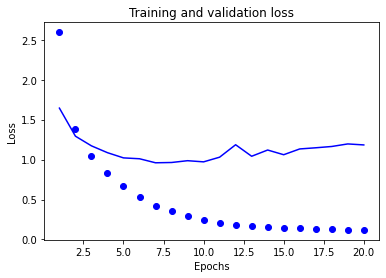

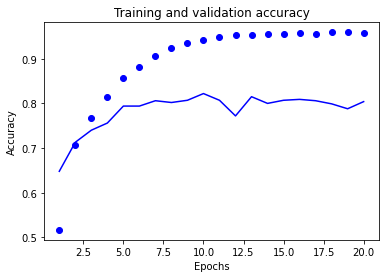

In [29]:
loss_plot(history_dict)
acc_plot(history_dict)

In [30]:
model_test(64, 10, 3, activation = 'relu', loss = 'categorical_crossentropy', metrics = ['acc'])

Epoch 1/10
18/18 [==============================] - 1s 41ms/step - loss: 2.5406 - acc: 0.5243
Epoch 2/10
18/18 [==============================] - 1s 42ms/step - loss: 1.3416 - acc: 0.7094
Epoch 3/10
18/18 [==============================] - 1s 41ms/step - loss: 1.0149 - acc: 0.7737
Epoch 4/10
18/18 [==============================] - 1s 40ms/step - loss: 0.7964 - acc: 0.8275
Epoch 5/10
18/18 [==============================] - 1s 42ms/step - loss: 0.6321 - acc: 0.8663
Epoch 6/10
18/18 [==============================] - 1s 41ms/step - loss: 0.5033 - acc: 0.8931
Epoch 7/10
18/18 [==============================] - 1s 41ms/step - loss: 0.4113 - acc: 0.9089
Epoch 8/10
18/18 [==============================] - 1s 41ms/step - loss: 0.3284 - acc: 0.9270
Epoch 9/10
18/18 [==============================] - 1s 40ms/step - loss: 0.2790 - acc: 0.9332
Epoch 10/10
71/71 [==============================] - 0s 2ms/step - loss: 1.1456 - acc: 0.7609


[1.1455968618392944, 0.760908305644989]

정확도 약 76.1%

3개의 층을 사용한 모델을 제외하곤  
비슷한 정확도를 보임  

은닉 유닛이 많을 수록  
층의 깊이가 깊어 질수록 그래프의 변동량이 조금 컸는데,  

**혼자만의 뇌피셜**  
**은닉 유닛**  
분류 값의 범위보다 훨씬 큰 차원으로 학습을 진행하다보니  
중간에 필요없는 부분의 값도 같이 학습하게 되지 않았나 생각 됨  
그래서 가중치의 조정이 많이 일어난 듯   

**층의 깊이**  
층이 깊어지면 그 만큼 연산량이 많아져 좀 더 많은 연산량을 요하게 됨  
이때, 수많은 가중치의 재설정으로 인해 그래프가 다른 모델에 비해 흔들리지 않았나 싶음
